In [36]:
from analysis import *

drop_cols = [
    "TWD","COG","TWA", "TimeUTC", "SecondsSince1970", "ISODateTimeUTC","Latitude","Longitude","Euler_X (deg)","Euler_Y (deg)",
    "Lat", "LatBow", "LatCenter", "LatStern", "Lon", "LonBow", "LonCenter", "LonStern",
    "Leg", "Log", "LogAlongCourse", "MagneticVariation", "Rank", "TimeLocal",
    "DistanceToLeader", "interval_id", "boat_name", "interval_duration",
    "Heel", "Heel_Lwd", "Line_R", "Line_L", "BelowLineCalc", "VMC","XTE","VMG","gain_forward","gain_lateral", "gain_vmg","Total_lines", "LoadCell_1","LoadCell_2","LoadCell_3","LoadCell_4","LoadCell_5","LoadCell_6","M_tot_X","M_tot_Y","M_front_X","M_front_Y","M_back_X","M_back_Y","P_front_X","P_front_Y","P_back_X","P_back_Y","Side_lines","total_line2"
]

MAX_NULL_RATIO = 0.2


In [37]:
df = pd.read_csv("all_data_enriched.csv")
df = df[df["boat_name"] == "SenseBoard"].copy()
load_cell_cols = ["LoadCell_1", "LoadCell_2", "LoadCell_3", "LoadCell_4", "LoadCell_5", "LoadCell_6"]
df = df.dropna(subset=load_cell_cols, how='all')
df.sample(10)

,ISODateTimeUTC,SecondsSince1970,Heel_Abs,Heel_Lwd,Lat,LatBow,LatCenter,LatStern,Leg,Line_C,...,M_tot_X,M_tot_Y,M_front_X,M_front_Y,M_back_X,M_back_Y,P_front_X,P_front_Y,P_back_X,P_back_Y
43338,2025-06-09 12:37:44.661000+00:00,1.749473e+09,58.9,58.9,43.508594,43.508593,43.508599,43.508605,1.0,7.600,...,7070.904179,696.799668,5212.660119,732.449681,1858.244059,-689.475565,27.754646,-197.522832,-22.446330,-60.496357
73767,2025-06-10 13:25:48.854000+00:00,1.749562e+09,58.1,58.1,43.532584,43.532586,43.532580,43.532573,NaN,122.800,...,-2593.931126,5228.172996,-756.463597,355.688351,-1837.467530,-923.863423,10.380903,22.077686,-17.205629,34.220192
74354,2025-06-10 13:32:48.157000+00:00,1.749562e+09,63.2,63.2,43.535832,43.535831,43.535837,43.535843,NaN,121.000,...,10524.927896,3935.678240,6933.188907,1444.083748,3591.738989,-859.741373,31.343822,-150.484790,-14.688030,-61.362138
61341,2025-06-10 12:36:54.951000+00:00,1.749559e+09,58.2,58.2,43.533758,43.533756,43.533762,43.533768,NaN,114.700,...,9897.912634,5475.142564,6456.962264,1432.814046,3440.950370,-1002.636667,38.987437,-175.696500,-18.814991,-64.571198
49907,2025-06-09 13:06:08.256000+00:00,1.749474e+09,59.4,59.4,43.503846,43.503844,43.503850,43.503856,NaN,8.700,...,6938.483588,805.245249,4708.600116,700.517906,2229.883472,-403.159432,24.852319,-167.047312,-12.719555,-70.352129
29886,2025-06-07 12:36:53.263000+00:00,1.749300e+09,42.8,42.8,43.516143,43.516142,43.516146,43.516149,1.0,7.300,...,5955.194251,107.549628,4656.710399,636.133172,1298.483853,-174.403779,23.763303,-173.955428,-6.344862,-47.239237
59761,2025-06-10 12:29:40.260000+00:00,1.749559e+09,65.3,65.3,43.529453,43.529451,43.529457,43.529463,NaN,115.700,...,9512.956852,6870.277715,6190.637748,1248.034219,3322.319104,-1089.777400,36.325210,-180.184337,-19.630463,-59.845858
36857,2025-06-07 13:12:20.457000+00:00,1.749302e+09,31.4,31.4,43.516365,43.516367,43.516361,43.516355,1.0,94.355,...,-3966.092572,2036.469983,-2450.662807,372.632667,-1515.429765,-704.810643,19.682918,129.447035,-25.469729,54.763057
56192,2025-06-09 13:34:25.444000+00:00,1.749476e+09,51.3,51.3,43.507404,43.507402,43.507408,43.507414,1.0,8.900,...,10591.188237,1482.162523,6649.475671,1820.464890,3941.712566,-1228.358836,46.408902,-169.514320,-27.289183,-87.568967
61196,2025-06-10 12:36:47.645000+00:00,1.749559e+09,52.0,52.0,43.534482,43.534480,43.534486,43.534492,NaN,105.300,...,8148.652934,5006.176336,6332.324604,1390.239517,1816.328330,-631.249647,36.919477,-168.162471,-12.275937,-35.322210


## I. All together

In [38]:
# Select numeric columns
df_numeric = df.select_dtypes(include=["float64", "int64"]).copy()
# Drop specified columns
df_numeric.drop(columns=[c for c in drop_cols if c in df_numeric.columns], inplace=True)

# Drop rows where 'SOG' is missing
df_numeric.dropna(subset=["SOG"], inplace=True)


# Print summary
print(f"Variables utilisées: {df_numeric.columns.tolist()}")
print(f"Number of rows after filtering: {len(df_numeric)}")



Variables utilisées: ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'SOG', 'boat_weight', 'side_line2', 'F_front', 'F_back']
Number of rows after filtering: 30546



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 30546
- Removed samples with NaNs: 225
- Final samples: 30321

Correlation with SOG:


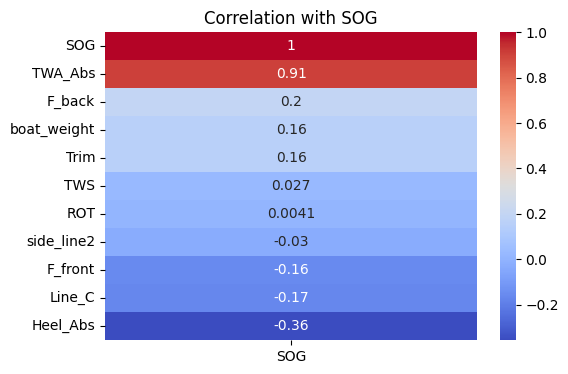


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
TWA_Abs,73467.226974,1.0,100388.784613,0.000000e+00,0.768093
TWS,2245.879663,1.0,3068.866746,0.000000e+00,0.091940
Trim,757.351562,1.0,1034.877809,2.702039e-223,0.033016
boat_weight,647.964501,1.0,885.406615,8.417462e-192,0.028383
side_line2,644.329430,1.0,880.439497,9.428261e-191,0.028228
F_front,287.584360,1.0,392.967662,6.653345e-87,0.012799
F_back,245.179228,1.0,335.023462,1.950736e-74,0.010932
Line_C,227.784110,1.0,311.254023,2.587822e-69,0.010165
Heel_Abs,92.841336,1.0,126.862402,2.277658e-29,0.004168
ROT,27.711273,1.0,37.865878,7.672724e-10,0.001248



Polynomial fit:
R² (entire dataset): 0.864

Top coefficients:
    feature  coefficient
        TWS     0.256136
       Trim    -0.054643
    TWA_Abs     0.050117
boat_weight     0.044877
 side_line2     0.010588
   Heel_Abs     0.010189
     Line_C     0.006311
        ROT     0.001631
    F_front     0.000015
     F_back     0.000010


,feature,coefficient
5,TWS,0.256136
3,Trim,-0.054643
4,TWA_Abs,0.050117
6,boat_weight,0.044877
7,side_line2,0.010588
0,Heel_Abs,0.010189
1,Line_C,0.006311
2,ROT,0.001631
8,F_front,0.000015
9,F_back,0.000010


In [39]:
full_analysis(df_numeric, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

## II Upwind:

### II.1. All upwind data

In [40]:
upwind_data = df[df['TWA'] >= 0]
df_numeric_upwind = upwind_data.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_upwind.drop(columns=[c for c in drop_cols if c in df_numeric_upwind.columns], inplace=True)
df_numeric_upwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_upwind)}")

Number of rows after filtering: 18876


In [41]:
print(upwind_data['boat_name'].unique())
print(upwind_data['opponent_name'].unique())
print(upwind_data['TWA'].mean())

['SenseBoard']
['Karl Maeder' 'Gian Stragiotti']
48.36674316592499



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 18876
- Removed samples with NaNs: 142
- Final samples: 18734

Correlation with SOG:


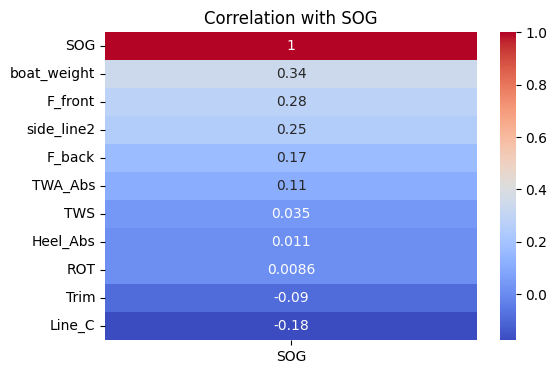


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
F_front,731.845079,1.0,1371.691400,7.852819e-290,0.068261
boat_weight,661.777835,1.0,1240.364924,3.742710e-263,0.062132
TWS,540.685631,1.0,1013.402771,1.262820e-216,0.051347
Trim,289.202196,1.0,542.049372,3.216868e-118,0.028136
TWA_Abs,194.498981,1.0,364.547890,1.676042e-80,0.019099
side_line2,164.059123,1.0,307.494708,2.697128e-68,0.016158
F_back,73.953416,1.0,138.610299,6.943574e-32,0.007349
Line_C,24.756907,1.0,46.401674,9.925988e-12,0.002472
ROT,22.106760,1.0,41.434524,1.248444e-10,0.002208
Heel_Abs,21.044481,1.0,39.443503,3.451270e-10,0.002102



Polynomial fit:
R² (entire dataset): 0.305

Top coefficients:
    feature  coefficient
        TWS     0.171882
boat_weight     0.054998
       Trim    -0.042854
    TWA_Abs     0.019739
 side_line2     0.006845
   Heel_Abs    -0.006450
     Line_C     0.002646
        ROT     0.001776
    F_front     0.000030
     F_back     0.000007


,feature,coefficient
5,TWS,0.171882
6,boat_weight,0.054998
3,Trim,-0.042854
4,TWA_Abs,0.019739
7,side_line2,0.006845
0,Heel_Abs,-0.006450
1,Line_C,0.002646
2,ROT,0.001776
8,F_front,0.000030
9,F_back,0.000007


In [42]:
full_analysis(df_numeric_upwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

### II.2. Upwind: Gian vs Karl
#### II.2.1. Upwind: Gian

In [43]:
gian_data_upwind = upwind_data[((upwind_data['boat_name'] == "SenseBoard") & (upwind_data['opponent_name'] == "Karl Maeder"))]
df_numeric_gian_upwind = gian_data_upwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_gian_upwind.drop(columns=[c for c in drop_cols if c in df_numeric_gian_upwind.columns], inplace=True)
df_numeric_gian_upwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_gian_upwind)}")

Number of rows after filtering: 13275


In [44]:
print(gian_data_upwind['boat_name'].unique())
print(gian_data_upwind['opponent_name'].unique())
print(gian_data_upwind['TWA'].mean())

['SenseBoard']
['Karl Maeder']
48.03460655367232



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 13275
- Removed samples with NaNs: 99
- Final samples: 13176

Correlation with SOG:


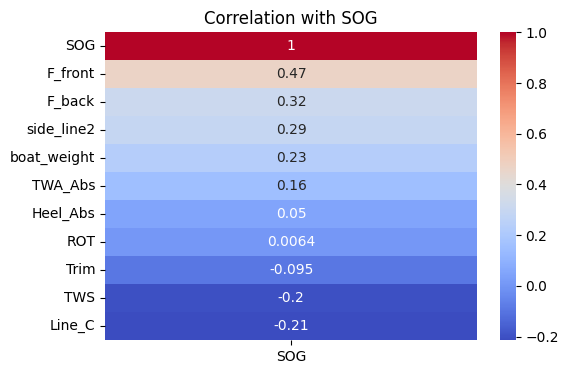


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
F_front,745.629996,1.0,1412.729594,8.868736e-294,0.096910
TWS,273.286139,1.0,517.789546,1.864731e-112,0.037842
Trim,163.475748,1.0,309.734089,1.517714e-68,0.022986
side_line2,95.731563,1.0,181.380595,4.526948e-41,0.013590
TWA_Abs,64.674117,1.0,122.536699,2.349092e-28,0.009222
F_back,36.690837,1.0,69.517363,8.321562e-17,0.005253
Heel_Abs,21.869944,1.0,41.436526,1.259836e-10,0.003138
ROT,11.513020,1.0,21.813478,3.034532e-06,0.001654
Line_C,0.964566,1.0,1.827543,1.764412e-01,0.000139
boat_weight,0.389227,1.0,0.737460,3.904915e-01,0.000056



Polynomial fit:
R² (entire dataset): 0.320

Top coefficients:
    feature  coefficient
        TWS     0.182063
       Trim    -0.038409
    TWA_Abs     0.014325
   Heel_Abs    -0.007962
 side_line2     0.006892
boat_weight     0.003196
        ROT     0.001474
     Line_C     0.000635
    F_front     0.000037
     F_back     0.000007


,feature,coefficient
5,TWS,0.182063
3,Trim,-0.038409
4,TWA_Abs,0.014325
0,Heel_Abs,-0.007962
7,side_line2,0.006892
6,boat_weight,0.003196
2,ROT,0.001474
1,Line_C,0.000635
8,F_front,0.000037
9,F_back,0.000007


In [45]:
full_analysis(df_numeric_gian_upwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### II.2.2. Upwind: Karl

In [46]:
karl_data_upwind = upwind_data[((upwind_data['boat_name'] == "SenseBoard") & (upwind_data['opponent_name'] == "Gian Stragiotti"))]
df_numeric_karl_upwind = karl_data_upwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_karl_upwind.drop(columns=[c for c in drop_cols if c in df_numeric_karl_upwind.columns], inplace=True)
df_numeric_karl_upwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_karl_upwind)}")
print(df_numeric_karl_upwind.shape)
print(df_numeric_karl_upwind.columns)

Number of rows after filtering: 5601
(5601, 11)
Index(['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'SOG',
       'boat_weight', 'side_line2', 'F_front', 'F_back'],
      dtype='object')


In [47]:
print(karl_data_upwind['boat_name'].unique())
print(karl_data_upwind['opponent_name'].unique())
print(karl_data_upwind['TWA'].mean())

['SenseBoard']
['Gian Stragiotti']
49.153944295661496


In [48]:
df_numeric_karl_upwind.head(10)

,Heel_Abs,Line_C,ROT,Trim,TWA_Abs,TWS,SOG,boat_weight,side_line2,F_front,F_back
25553,59.5,93.3,11.000,7.5,41.174,9.352,21.4,102.89,6.300,27567.598622,24661.188272
25555,57.4,88.1,-14.141,12.3,42.564,9.372,21.4,102.89,13.800,30282.257552,24532.446152
25557,59.8,98.4,1.020,8.7,42.454,9.391,21.3,102.89,18.300,30629.872010,26538.607253
25560,57.8,108.1,15.000,1.5,40.944,9.411,21.4,102.89,11.900,29534.445709,25671.679650
25562,53.0,111.4,-7.619,4.6,41.734,9.432,21.4,102.89,10.688,31969.060202,27080.840797
25563,54.8,111.3,-10.309,7.0,42.724,9.452,21.4,102.89,11.600,32674.719191,26459.098753
25565,54.6,110.7,11.224,7.0,41.614,9.471,21.3,102.89,12.000,34743.378192,26875.356725
25567,47.0,109.9,-19.802,6.2,43.604,9.492,21.4,102.89,12.600,34743.378192,26875.356725
25569,41.2,107.5,7.000,4.4,42.894,9.506,21.3,102.89,11.600,30655.266332,26253.937186
25571,51.7,104.6,1.000,8.5,42.784,9.516,21.4,102.89,11.296,30655.266332,26253.937186



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 5601
- Removed samples with NaNs: 43
- Final samples: 5558

Correlation with SOG:


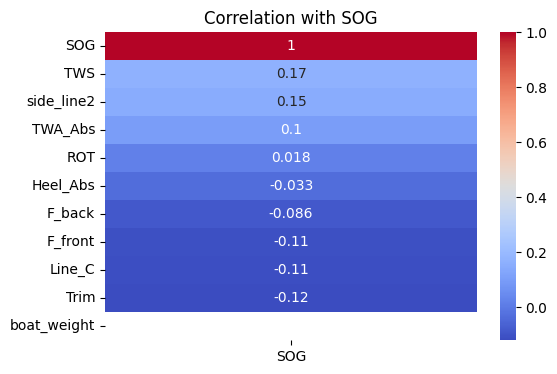


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
boat_weight,4178.746023,1.0,8976.289800,0.000000e+00,0.618019
TWA_Abs,240.195618,1.0,515.959923,2.707483e-109,0.085086
TWS,142.607444,1.0,306.332507,8.343355e-67,0.052326
Trim,87.339577,1.0,187.612588,5.062388e-42,0.032710
side_line2,52.124809,1.0,111.968374,6.403063e-26,0.019783
Line_C,34.647266,1.0,74.425175,8.119390e-18,0.013237
F_back,18.566443,1.0,39.882246,2.907169e-10,0.007137
ROT,9.605334,1.0,20.633048,5.680581e-06,0.003705
F_front,3.617646,1.0,7.771000,5.327234e-03,0.001399
Heel_Abs,1.574062,1.0,3.381214,6.599688e-02,0.000609



Polynomial fit:
R² (entire dataset): 0.151

Top coefficients:
    feature   coefficient
        TWS  1.971931e-01
       Trim -4.406866e-02
    TWA_Abs  3.863704e-02
 side_line2  7.257549e-03
     Line_C  5.985606e-03
   Heel_Abs  3.275131e-03
        ROT  2.389899e-03
     F_back  5.759508e-06
    F_front -5.067973e-06
boat_weight  4.163336e-17


,feature,coefficient
5,TWS,1.971931e-01
3,Trim,-4.406866e-02
4,TWA_Abs,3.863704e-02
7,side_line2,7.257549e-03
1,Line_C,5.985606e-03
0,Heel_Abs,3.275131e-03
2,ROT,2.389899e-03
9,F_back,5.759508e-06
8,F_front,-5.067973e-06
6,boat_weight,4.163336e-17


In [49]:
full_analysis(df_numeric_karl_upwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### II.2.3. Upwind: Karl vs Gian t_test

In [50]:
t_test(df_numeric_gian_upwind,df_numeric_karl_upwind)

T-statistic: 39.897, p-value: 0.000000000000000
The difference is statistically significant, keeping data split.


### II.3. Upwind: Master vs Slave
#### II.3.1. Master

In [51]:
master_data_upwind = upwind_data[upwind_data['boat_role'] == "master"]
df_numeric_master_upwind = master_data_upwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_master_upwind.drop(columns=[c for c in drop_cols if c in df_numeric_master_upwind.columns], inplace=True)
df_numeric_master_upwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_master_upwind)}")

Number of rows after filtering: 9638



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 9638
- Removed samples with NaNs: 84
- Final samples: 9554

Correlation with SOG:


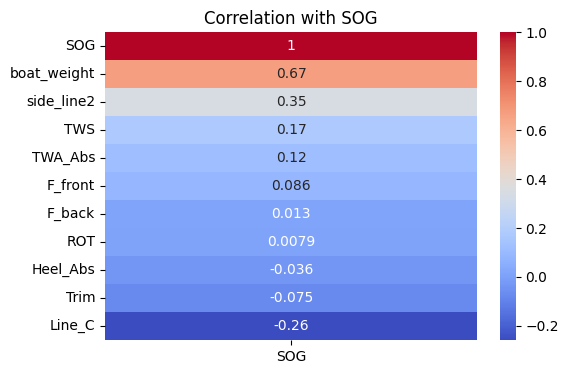


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
boat_weight,1312.728728,1.0,3420.375560,0.000000e+00,0.263849
F_front,209.247947,1.0,545.205228,2.591011e-117,0.054044
TWS,101.300154,1.0,263.942248,1.443529e-58,0.026914
Trim,85.027117,1.0,221.542095,1.495908e-49,0.022688
side_line2,60.237181,1.0,156.950768,1.001537e-35,0.016181
Heel_Abs,18.984237,1.0,49.464310,2.158910e-12,0.005157
Line_C,16.451847,1.0,42.866051,6.163771e-11,0.004472
F_back,13.622907,1.0,35.495115,2.647350e-09,0.003706
TWA_Abs,2.005523,1.0,5.225483,2.228008e-02,0.000547
ROT,1.301310,1.0,3.390624,6.559913e-02,0.000355



Polynomial fit:
R² (entire dataset): 0.524

Top coefficients:
    feature  coefficient
boat_weight     0.131960
        TWS     0.112238
       Trim    -0.032745
   Heel_Abs    -0.008463
 side_line2     0.005886
    TWA_Abs    -0.003390
     Line_C     0.002971
        ROT     0.000640
    F_front     0.000023
     F_back     0.000004


,feature,coefficient
6,boat_weight,0.131960
5,TWS,0.112238
3,Trim,-0.032745
0,Heel_Abs,-0.008463
7,side_line2,0.005886
4,TWA_Abs,-0.003390
1,Line_C,0.002971
2,ROT,0.000640
8,F_front,0.000023
9,F_back,0.000004


In [52]:
full_analysis(df_numeric_master_upwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### II.3.2 Slave

In [53]:
slave_data_upwind = upwind_data[upwind_data['boat_role'] == "slave"]
df_numeric_slave_upwind = slave_data_upwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_slave_upwind.drop(columns=[c for c in drop_cols if c in df_numeric_slave_upwind.columns], inplace=True)
df_numeric_slave_upwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_slave_upwind)}")

Number of rows after filtering: 9238



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 9238
- Removed samples with NaNs: 58
- Final samples: 9180

Correlation with SOG:


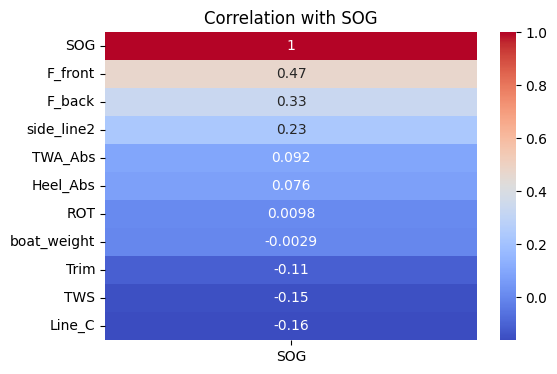


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
F_front,224.179921,1.0,478.780735,1.696547e-103,0.049626
Trim,118.173094,1.0,252.382106,4.382374e-56,0.026788
F_back,107.546920,1.0,229.687802,2.905749e-51,0.024438
side_line2,68.210989,1.0,145.678111,2.727670e-33,0.015640
TWS,39.247143,1.0,83.820066,6.585545e-20,0.009059
Heel_Abs,14.094175,1.0,30.100908,4.210553e-08,0.003272
boat_weight,6.732759,1.0,14.379144,1.504077e-04,0.001566
Line_C,4.766209,1.0,10.179186,1.425134e-03,0.001109
ROT,2.217935,1.0,4.736840,2.954869e-02,0.000516
TWA_Abs,1.180730,1.0,2.521683,1.123252e-01,0.000275



Polynomial fit:
R² (entire dataset): 0.306

Top coefficients:
    feature  coefficient
        TWS     0.075169
       Trim    -0.039206
boat_weight    -0.008108
   Heel_Abs    -0.007704
 side_line2     0.006425
    TWA_Abs     0.002190
     Line_C     0.001727
        ROT     0.000767
    F_front     0.000026
     F_back     0.000017


,feature,coefficient
5,TWS,0.075169
3,Trim,-0.039206
6,boat_weight,-0.008108
0,Heel_Abs,-0.007704
7,side_line2,0.006425
4,TWA_Abs,0.002190
1,Line_C,0.001727
2,ROT,0.000767
8,F_front,0.000026
9,F_back,0.000017


In [54]:
full_analysis(df_numeric_slave_upwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### III.3.3. Upwind: Master vs Slave t_test

In [55]:
t_test(df_numeric_master_upwind,df_numeric_slave_upwind)

T-statistic: 25.880, p-value: 0.000000000000000
The difference is statistically significant, keeping data split.


## III Downwind
### III.1. All downwind data

In [56]:
downwind_data = df[df['TWA'] < 0]
df_numeric_downwind = downwind_data.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_downwind.drop(columns=[c for c in drop_cols if c in df_numeric_downwind.columns], inplace=True)
df_numeric_downwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_downwind)}")

Number of rows after filtering: 11670


In [57]:
print(downwind_data['boat_name'].unique())
print(downwind_data['opponent_name'].unique())
print(downwind_data['TWA'].mean())

['SenseBoard']
['Karl Maeder' 'Gian Stragiotti']
-141.4931527849186



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 11670
- Removed samples with NaNs: 83
- Final samples: 11587

Correlation with SOG:


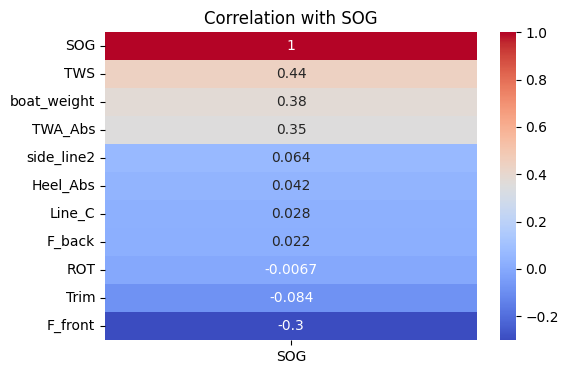


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
TWS,1248.301950,1.0,1448.469077,9.827266e-299,0.111211
side_line2,295.487694,1.0,342.869597,1.851718e-75,0.028767
Trim,271.895612,1.0,315.494490,1.161722e-69,0.026531
Heel_Abs,255.526962,1.0,296.501101,1.248243e-65,0.024974
F_back,204.637994,1.0,237.452010,4.746820e-53,0.020100
Line_C,197.092285,1.0,228.696334,3.532461e-51,0.019373
F_front,196.115681,1.0,227.563131,6.172231e-51,0.019279
TWA_Abs,164.259341,1.0,190.598578,5.155183e-43,0.016198
boat_weight,130.315074,1.0,151.211295,1.547463e-34,0.012894
ROT,9.107627,1.0,10.568049,1.153880e-03,0.000912



Polynomial fit:
R² (entire dataset): 0.397

Top coefficients:
    feature  coefficient
        TWS     0.346551
       Trim    -0.059078
boat_weight     0.039324
   Heel_Abs     0.028705
    TWA_Abs     0.020147
 side_line2     0.012842
     Line_C     0.010776
        ROT    -0.001793
    F_front    -0.000025
     F_back     0.000017


,feature,coefficient
5,TWS,0.346551
3,Trim,-0.059078
6,boat_weight,0.039324
0,Heel_Abs,0.028705
4,TWA_Abs,0.020147
7,side_line2,0.012842
1,Line_C,0.010776
2,ROT,-0.001793
8,F_front,-0.000025
9,F_back,0.000017


In [58]:

full_analysis(df_numeric_downwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

### III.2. Downwind: Gian vs Karl
#### III.2.1. Downwind: Gian

In [59]:
gian_data_downwind = downwind_data[((downwind_data['boat_name'] == "SenseBoard") & (downwind_data['opponent_name'] == "Karl Maeder"))]
df_numeric_gian_downwind = gian_data_downwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_gian_downwind.drop(columns=[c for c in drop_cols if c in df_numeric_gian_downwind.columns], inplace=True)
df_numeric_gian_downwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_gian_downwind)}")

Number of rows after filtering: 7826


In [60]:
print(gian_data_downwind['boat_name'].unique())
print(gian_data_downwind['opponent_name'].unique())
print(gian_data_downwind['TWA'].mean())

['SenseBoard']
['Karl Maeder']
-144.02090429338105



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 7826
- Removed samples with NaNs: 58
- Final samples: 7768

Correlation with SOG:


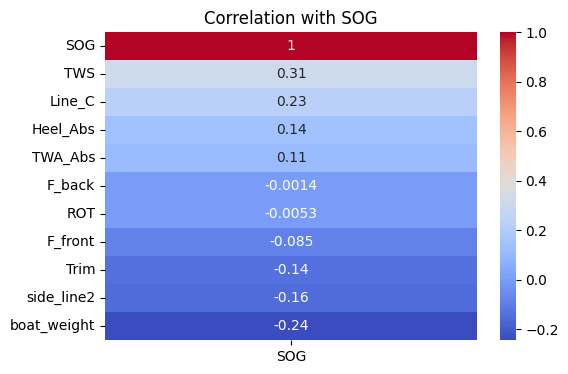


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
TWS,952.143910,1.0,1176.040444,4.203233e-240,0.131651
side_line2,376.146154,1.0,464.596879,3.980345e-100,0.056509
boat_weight,206.721273,1.0,255.331757,1.419411e-56,0.031867
Line_C,140.327520,1.0,173.325520,3.647492e-39,0.021856
Trim,135.947370,1.0,167.915378,5.225969e-38,0.021188
Heel_Abs,133.417851,1.0,164.791044,2.433932e-37,0.020802
TWA_Abs,73.730867,1.0,91.068672,1.819718e-21,0.011604
F_back,37.939543,1.0,46.861022,8.201305e-12,0.006005
F_front,33.358926,1.0,41.203273,1.452607e-10,0.005284
ROT,2.008182,1.0,2.480406,1.153133e-01,0.000320



Polynomial fit:
R² (entire dataset): 0.260

Top coefficients:
    feature  coefficient
        TWS     0.366676
boat_weight    -0.100000
       Trim    -0.051392
   Heel_Abs     0.024911
    TWA_Abs     0.020853
 side_line2     0.018770
     Line_C     0.010983
        ROT    -0.001032
    F_front    -0.000012
     F_back     0.000008


,feature,coefficient
5,TWS,0.366676
6,boat_weight,-0.100000
3,Trim,-0.051392
0,Heel_Abs,0.024911
4,TWA_Abs,0.020853
7,side_line2,0.018770
1,Line_C,0.010983
2,ROT,-0.001032
8,F_front,-0.000012
9,F_back,0.000008


In [61]:

full_analysis(df_numeric_gian_downwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### III.2.2. Downwind: Karl

In [62]:
karl_data_downwind = downwind_data[
    (downwind_data['boat_name'] == "Karl Maeder") |
    ((downwind_data['boat_name'] == "SenseBoard") & (downwind_data['opponent_name'] == "Gian Stragiotti"))
]
df_numeric_karl_downwind = karl_data_downwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_karl_downwind.drop(columns=[c for c in drop_cols if c in df_numeric_karl_downwind.columns], inplace=True)
df_numeric_karl_downwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_karl_downwind)}")

Number of rows after filtering: 3844


In [63]:
print(karl_data_downwind['boat_name'].unique())
print(karl_data_downwind['opponent_name'].unique())
print(karl_data_downwind['TWA'].mean())

['SenseBoard']
['Gian Stragiotti']
-136.34690322580647



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 3844
- Removed samples with NaNs: 25
- Final samples: 3819

Correlation with SOG:


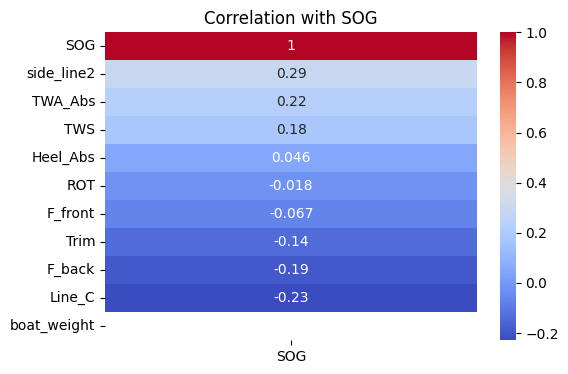


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
boat_weight,1655.968281,1.0,2547.666421,0.000000e+00,0.400787
Trim,193.341122,1.0,297.450555,3.072179e-64,0.072435
F_front,112.974524,1.0,173.808524,7.635452e-39,0.043640
Heel_Abs,87.467643,1.0,134.566814,1.334515e-30,0.034123
TWA_Abs,64.185882,1.0,98.748398,5.447713e-23,0.025270
side_line2,15.235291,1.0,23.439120,1.340481e-06,0.006116
TWS,9.658737,1.0,14.859729,1.177194e-04,0.003886
F_back,8.689702,1.0,13.368892,2.592874e-04,0.003498
ROT,6.404836,1.0,9.853683,1.707883e-03,0.002580
Line_C,5.876582,1.0,9.040977,2.657184e-03,0.002368



Polynomial fit:
R² (entire dataset): 0.233

Top coefficients:
    feature   coefficient
       Trim -8.783507e-02
        TWS  7.542844e-02
   Heel_Abs  3.101455e-02
    TWA_Abs  2.389656e-02
 side_line2  6.006656e-03
     Line_C -3.798130e-03
        ROT -2.636859e-03
    F_front  8.152913e-05
     F_back -1.508854e-05
boat_weight  5.273559e-16


,feature,coefficient
3,Trim,-8.783507e-02
5,TWS,7.542844e-02
0,Heel_Abs,3.101455e-02
4,TWA_Abs,2.389656e-02
7,side_line2,6.006656e-03
1,Line_C,-3.798130e-03
2,ROT,-2.636859e-03
8,F_front,8.152913e-05
9,F_back,-1.508854e-05
6,boat_weight,5.273559e-16


In [64]:
full_analysis(df_numeric_karl_downwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### III.2.3. Downwind: Karl vs Gian t_test

In [65]:
t_test(df_numeric_karl_downwind,df_numeric_gian_downwind)

T-statistic: -69.413, p-value: 0.000000000000000
The difference is statistically significant, keeping data split.


### III.3. Downwind: Master vs Slave
#### III.3.1 Downwind Master

In [66]:
master_data_downwind = downwind_data[downwind_data['boat_role'] == "master"]
df_numeric_master_downwind = master_data_downwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_master_downwind.drop(columns=[c for c in drop_cols if c in df_numeric_master_downwind.columns], inplace=True)
df_numeric_master_downwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_master_downwind)}")

Number of rows after filtering: 6136



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 6136
- Removed samples with NaNs: 49
- Final samples: 6087

Correlation with SOG:


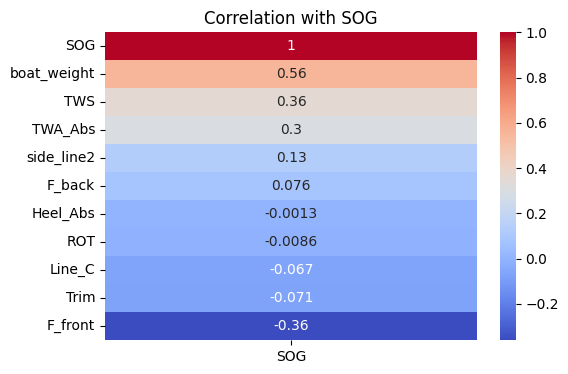


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
boat_weight,339.843861,1.0,499.827239,1.846228e-106,0.076010
Trim,133.872279,1.0,196.893395,4.817518e-44,0.031388
F_front,114.703686,1.0,168.701081,4.551325e-38,0.027015
TWS,102.152987,1.0,150.242072,3.874046e-34,0.024130
Heel_Abs,99.699202,1.0,146.633154,2.281538e-33,0.023564
F_back,64.338602,1.0,94.626356,3.336637e-22,0.015335
TWA_Abs,54.980830,1.0,80.863360,3.178833e-19,0.013134
ROT,5.619890,1.0,8.265484,4.054627e-03,0.001359
Line_C,1.917553,1.0,2.820252,9.313320e-02,0.000464
side_line2,0.083549,1.0,0.122880,7.259435e-01,0.000020



Polynomial fit:
R² (entire dataset): 0.427

Top coefficients:
    feature  coefficient
        TWS     0.145280
boat_weight     0.101161
       Trim    -0.055863
   Heel_Abs     0.024578
    TWA_Abs     0.014528
        ROT    -0.001971
     Line_C     0.001472
 side_line2     0.000302
    F_front    -0.000026
     F_back     0.000014


,feature,coefficient
5,TWS,0.145280
6,boat_weight,0.101161
3,Trim,-0.055863
0,Heel_Abs,0.024578
4,TWA_Abs,0.014528
2,ROT,-0.001971
1,Line_C,0.001472
7,side_line2,0.000302
8,F_front,-0.000026
9,F_back,0.000014


In [67]:
full_analysis(df_numeric_master_downwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### III.3.2 Downwind Slave

In [68]:
slave_data_downwind = downwind_data[downwind_data['boat_role'] == "slave"]
df_numeric_slave_downwind = slave_data_downwind.select_dtypes(include=["float64", "int64"]).copy()
df_numeric_slave_downwind.drop(columns=[c for c in drop_cols if c in df_numeric_slave_downwind.columns], inplace=True)
df_numeric_slave_downwind.dropna(subset=["SOG"], inplace=True)
print(f"Number of rows after filtering: {len(df_numeric_slave_downwind)}")

Number of rows after filtering: 5534



Initial features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Selected features (10): ['Heel_Abs', 'Line_C', 'ROT', 'Trim', 'TWA_Abs', 'TWS', 'boat_weight', 'side_line2', 'F_front', 'F_back']

Data cleaning:
- Initial samples: 5534
- Removed samples with NaNs: 34
- Final samples: 5500

Correlation with SOG:


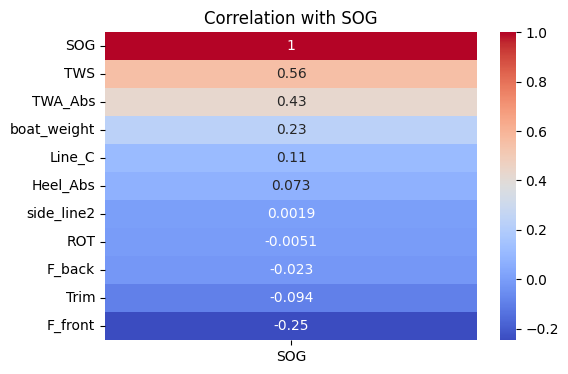


ANOVA:


,sum_sq,df,F,PR(>F),partial_eta_sq
TWS,1319.921098,1.0,1552.419167,3.133129e-299,0.220470
side_line2,392.307459,1.0,461.410626,2.407532e-98,0.077543
Line_C,255.467777,1.0,300.467259,1.414782e-65,0.051899
TWA_Abs,237.715797,1.0,279.588348,2.962826e-61,0.048467
Trim,98.253957,1.0,115.560942,1.091747e-26,0.020619
Heel_Abs,72.223577,1.0,84.945431,4.278816e-20,0.015240
F_back,37.399356,1.0,43.987081,3.622621e-11,0.007950
ROT,4.864178,1.0,5.720980,1.679682e-02,0.001041
boat_weight,4.640185,1.0,5.457532,1.951996e-02,0.000993
F_front,0.055892,1.0,0.065737,7.976568e-01,0.000012



Polynomial fit:
R² (entire dataset): 0.494

Top coefficients:
    feature   coefficient
        TWS  5.377243e-01
       Trim -5.366534e-02
    TWA_Abs  4.299441e-02
   Heel_Abs  2.261534e-02
 side_line2  2.168044e-02
     Line_C  1.789292e-02
boat_weight  1.026231e-02
        ROT -1.878580e-03
     F_back  1.009039e-05
    F_front -6.472631e-07


,feature,coefficient
5,TWS,5.377243e-01
3,Trim,-5.366534e-02
4,TWA_Abs,4.299441e-02
0,Heel_Abs,2.261534e-02
7,side_line2,2.168044e-02
1,Line_C,1.789292e-02
6,boat_weight,1.026231e-02
2,ROT,-1.878580e-03
9,F_back,1.009039e-05
8,F_front,-6.472631e-07


In [69]:
full_analysis(df_numeric_slave_downwind, target_variable="SOG",max_null_ratio= MAX_NULL_RATIO)

#### III.3.3. Downwind: Master vs Slave t_test

In [70]:
t_test(df_numeric_master_downwind,df_numeric_slave_downwind)

T-statistic: 9.267, p-value: 0.000000000000000
The difference is statistically significant, keeping data split.
